## Problem Statement

- NLP can be used to build predictive models to perform sentiment analysis on social media posts and reviews and predict if customers are happy or not.


- Natural language processors work by converting words into numbers and training machine learning models to make predictions. That way, you can automatically know if your customers are happy or not without manually going through a massive number of tweets and reviews.


- We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. 


- Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Code to display rows and columns of dataframe

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;  color: black !important;
}
</style>

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Importing Dataframe

In [4]:
df = pd.read_csv("df_FINAL")

In [5]:
df.head()

,Unnamed: 0,Review,Rating
0,0,"look ok, but my heart monitor sensors stopped ...",3
1,1,"Sudden drop in price after I order,\nAdapter l...",1
2,2,good,5
3,3,LAN ports are 10/100 Mbps so technically you a...,2
4,4,This phone is fantastic just wow it's as good ...,5


In [6]:
# Dropping the unnamed column
df = df.drop("Unnamed: 0",axis=1)

In [7]:
df.head()

,Review,Rating
0,"look ok, but my heart monitor sensors stopped ...",3
1,"Sudden drop in price after I order,\nAdapter l...",1
2,good,5
3,LAN ports are 10/100 Mbps so technically you a...,2
4,This phone is fantastic just wow it's as good ...,5


In [8]:
## Dataframe shape
print("Dataframe Shape ==>",df.shape)

Dataframe Shape ==> (20245, 2)


In [9]:
## Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20245 entries, 0 to 20244
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20231 non-null  object
 1   Rating  20245 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 316.5+ KB


In [10]:
# Using describe method
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,20245.0,3.023561,1.423193,1.0,2.0,3.0,4.0,5.0


In [11]:
# Checking out some of the ratings
df["Review"][5]

"Honestly, terrible product, when I'm playing on my PS4 with the headphones output to full and the headphone itself on full, I can't hear anything. I can hear literally my fan turning when I'm wearing the headphones."

In [12]:
# Checking out some of the ratings
df["Review"][15]

'Good camera but not a perfect camera.\nSlightly over priced and image stabilization is not good. If you want to see full review with video samples,you can see on\nDr Kalpana singh YouTube channel.'

### Data Cleaning

In [13]:
df.isnull().sum()

Review    14
Rating     0
dtype: int64

In [14]:
# There are only 14 missing values in 20000 so we can drop them
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [16]:
df.head()

,Review,Rating
0,"look ok, but my heart monitor sensors stopped ...",3
1,"Sudden drop in price after I order,\nAdapter l...",1
2,good,5
3,LAN ports are 10/100 Mbps so technically you a...,2
4,This phone is fantastic just wow it's as good ...,5


In [17]:
## Lets check for any kind of blank space
blanks = []

# tuple unpacking
for i,rev,rat in df.itertuples():
    if type(rev) == "str":
        
        if rev.isspace():
            
            blanks.append(i)

In [18]:
# No blank spaces in data
blanks

[]

In [19]:
## Lets try to remove the "-" symbol
df[df["Review"] == "-"]

,Review,Rating
10,-,1
112,-,3
393,-,4
468,-,2
663,-,5
...,...,...
19469,-,3
19643,-,4
19786,-,5
19847,-,4


In [20]:
df.head()

,Review,Rating
0,"look ok, but my heart monitor sensors stopped ...",3
1,"Sudden drop in price after I order,\nAdapter l...",1
2,good,5
3,LAN ports are 10/100 Mbps so technically you a...,2
4,This phone is fantastic just wow it's as good ...,5


In [21]:
# Replacing all the "-" values with nan
df["Review"] = df["Review"].replace({"-":np.nan})

In [22]:
def impute_Reviewes(cols):
    
    Review = cols[0]
    Rating = cols[1]
    
    if pd.isnull(Review):
        
        if Rating == 1:
            return "Very Bad Product"
        elif Rating == 2:
            return "It's a decent product not good enough"
        elif Rating == 3:
            return "Average product"
        elif Rating == 4:
            return "Very Good Product"
        elif Rating == 5:
            return "Best Product ever"
    
    else:
        return Review

In [23]:
# Applying the impute_Reviewes function
df['Review'] = df[['Review','Rating']].apply(impute_Reviewes,axis=1)

In [24]:
# No more "-" symbols
df[df["Review"] == "-"]

,Review,Rating


In [25]:
# No more null values
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [26]:
# No more null values in the data set

## Exploratory Data Analysis

<AxesSubplot:>

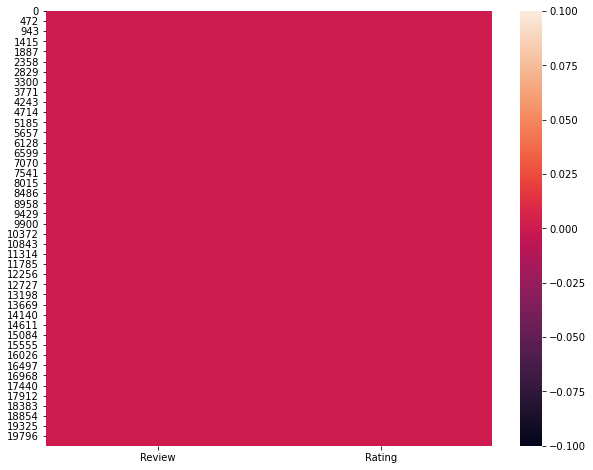

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Rating', ylabel='count'>

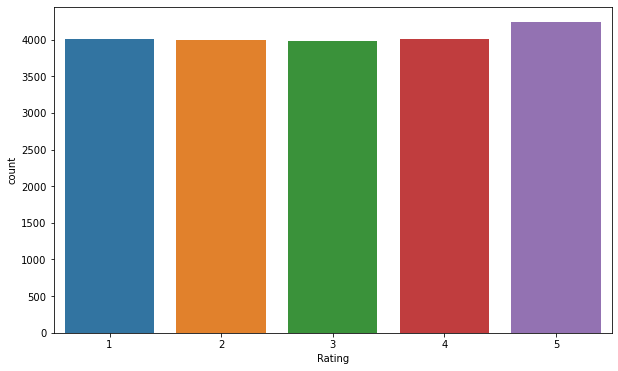

In [28]:
# Plotting a histogram of ratings
plt.figure(figsize=(10,6))
sns.countplot(x=df["Rating"])

The dependent variable Rating is Balanced

In [29]:
# Balanced dataset
df["Rating"].value_counts()

5    4237
1    4011
4    4007
2    3992
3    3984
Name: Rating, dtype: int64

In [30]:
# Getting the lenght of customer reviewes
df["Length"] = df["Review"].apply(len)

In [31]:
df.head()

,Review,Rating,Length
0,"look ok, but my heart monitor sensors stopped ...",3,88
1,"Sudden drop in price after I order,\nAdapter l...",1,60
2,good,5,4
3,LAN ports are 10/100 Mbps so technically you a...,2,383
4,This phone is fantastic just wow it's as good ...,5,250


<AxesSubplot:>

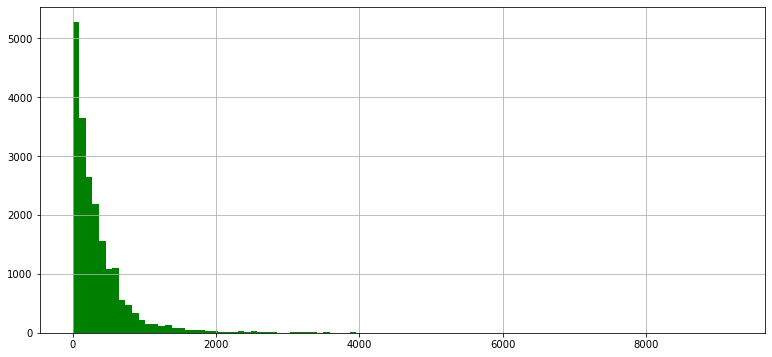

In [32]:
# Plotting a histogram of ratings
df["Length"].hist(bins = 100,figsize=(13,6), color="g")

Most of the reviews are very short but, there are also some very long reviews with word lengths up to 4000.

In [33]:
# Lets check the message with the longest length
df["Length"].max()

9200

In [34]:
# Checking out the message with longest length
df[df["Length"] == 9200]

,Review,Rating,Length
14038,I wanted to buy a laptop and my main purpose w...,5,9200


The longest message has a word length of 9200

In [35]:
# using describe method
df["Length"].describe()

count    20231.000000
mean       355.937077
std        486.718380
min          1.000000
25%         88.000000
50%        222.000000
75%        452.500000
max       9200.000000
Name: Length, dtype: float64

Average mean length for message is 355

<AxesSubplot:xlabel='Rating', ylabel='Length'>

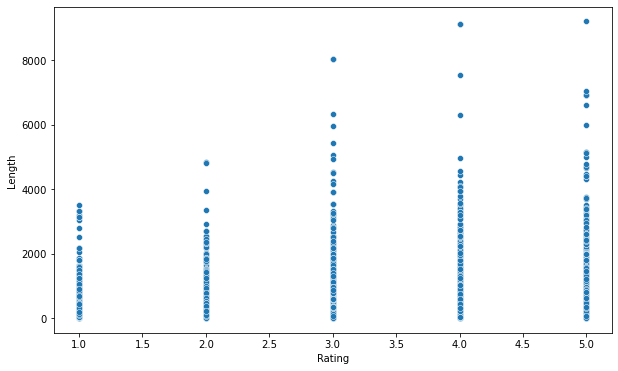

In [36]:
# Plotting a histogram of ratings
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Rating"],y=df["Length"])

From the above plot we can clearly observe that, High reviewes are having longer message length.

In [37]:
reviewes_5star = df[df["Rating"] == 5]

In [38]:
# Lets see what are the customers with 5 star Rating talking about
reviewes_5star.head()

,Review,Rating,Length
2,good,5,4
4,This phone is fantastic just wow it's as good ...,5,250
9,First and foremost I am gonna tell about the b...,5,1678
11,Canon 6D Mark II is the most anticipated camer...,5,6926
14,5\nAwesome\nNo more words it's Awesome\nFlipka...,5,99


In [39]:
sentences_5 = reviewes_5star["Review"].tolist()
#sentences_5

In [40]:
# Joining all the elements in the list
sentences_5_combining = " ".join(sentences_5)

In [41]:
#sentences_5_combining

In [42]:
# importing wordCloud
from wordcloud import WordCloud

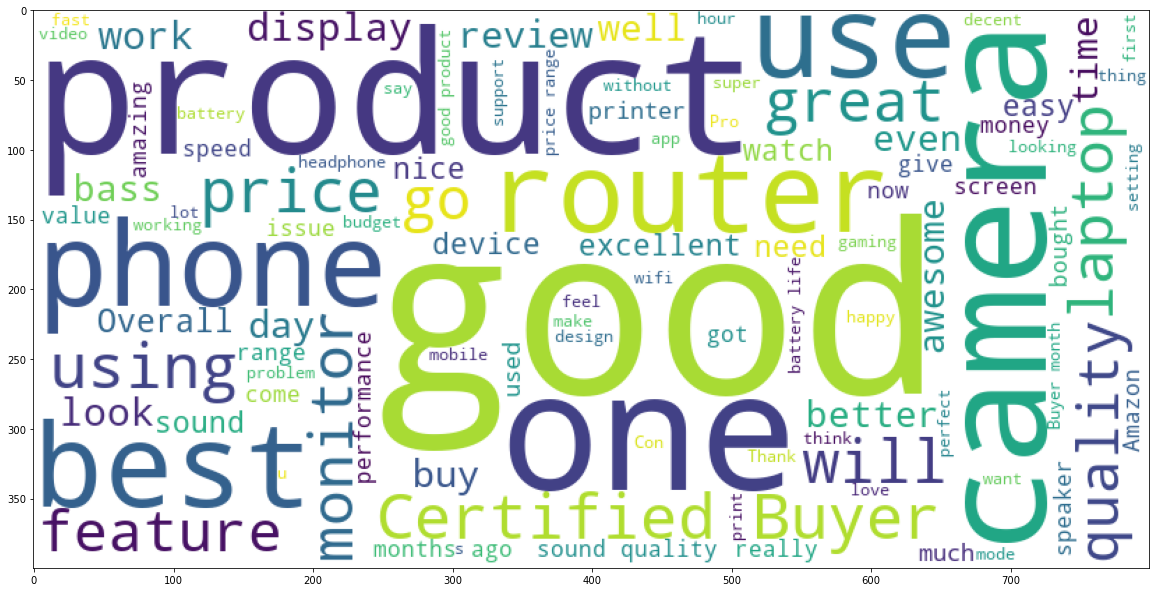

In [43]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width=800, height=400,background_color='white',max_words=100).generate(sentences_5_combining))

We can clearly observe the word cloud for 5-star customer ratings and there are a lot of positive words in there.

In [44]:
# Lets check the wordcloud for 4 star ratings

In [45]:
reviewes_4star = df[df["Rating"] == 4]

sentences_4 = reviewes_4star["Review"].tolist()

# Joining all the elements in the list
sentences_4_combining = " ".join(sentences_4)

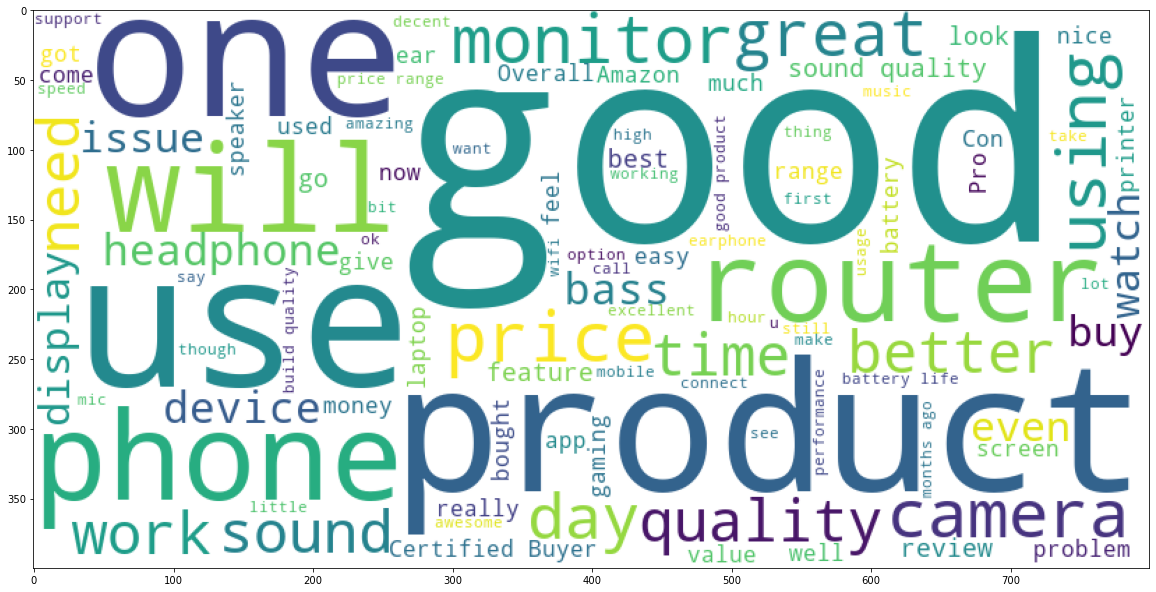

In [46]:
# Word cloud 
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width=800, height=400,background_color='white',max_words=100).generate(sentences_4_combining))

Above plot is the WordCloud for 4 star ratings 

In [47]:
# Lets check for 3 Star ratings

In [48]:
reviewes_3star = df[df["Rating"] == 3]

sentences_3 = reviewes_3star["Review"].tolist()

# Joining all the elements in the list
sentences_3_combining = " ".join(sentences_3)

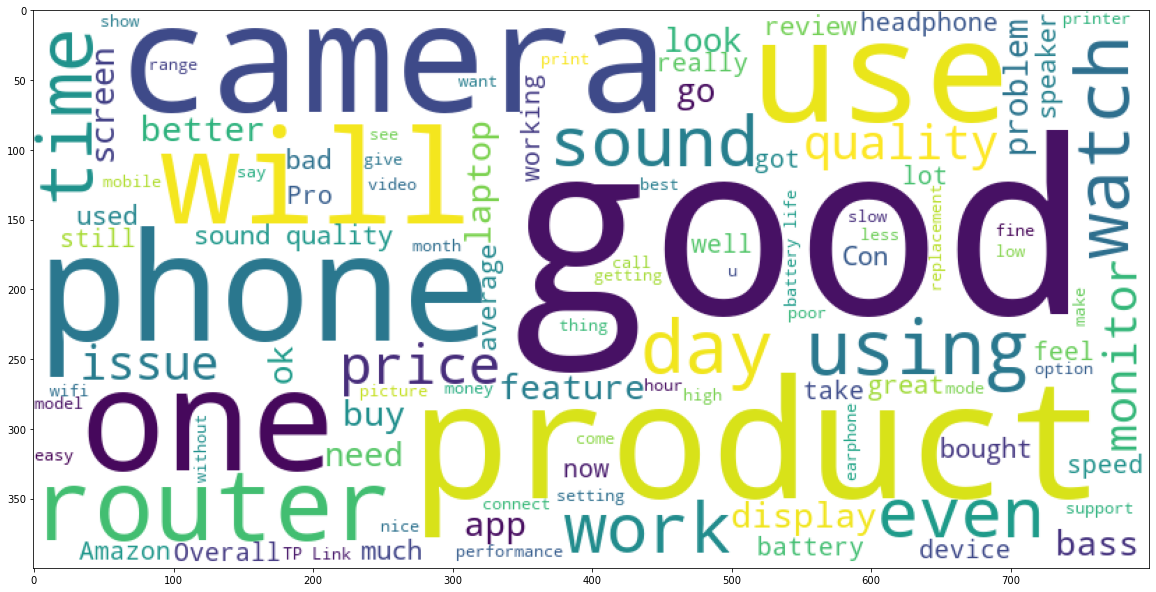

In [49]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width=800, height=400,background_color='white',max_words=100).generate(sentences_3_combining))

Above plot is the WordCloud for 3 star ratings 

In [50]:
# Lets check for 2 Star ratings

In [51]:
reviewes_2star = df[df["Rating"] == 2]

sentences_2 = reviewes_2star["Review"].tolist()

# Joining all the elements in the list
sentences_2_combining = " ".join(sentences_2)

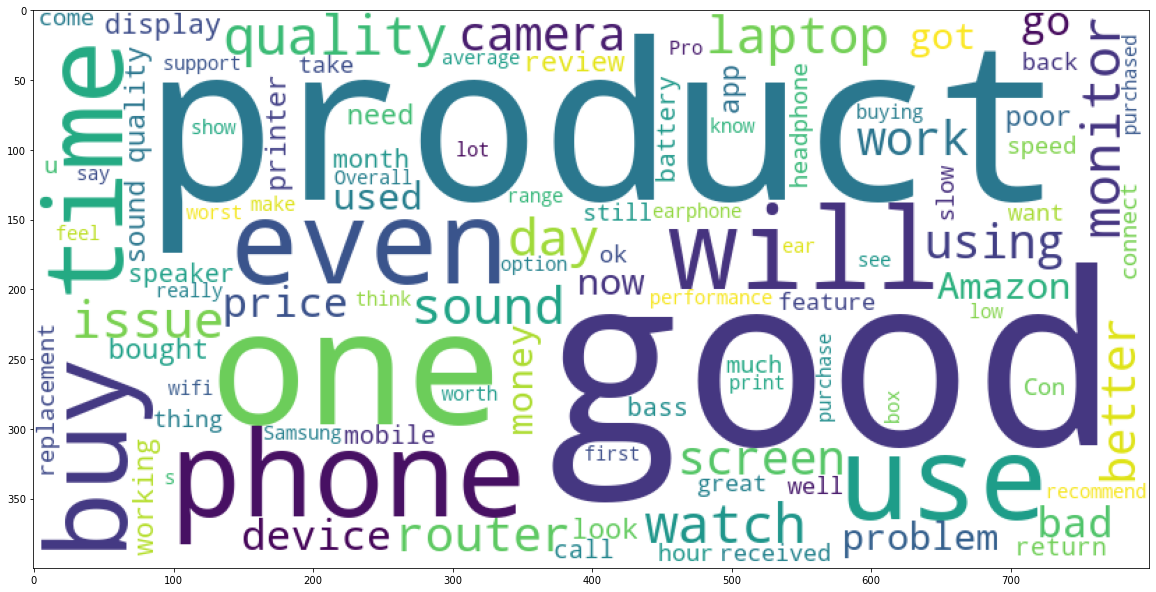

In [52]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width=800, height=400,background_color='white',max_words=100).generate(sentences_2_combining))

Above plot is the WordCloud for 2 star ratings 

In [53]:
# Lets check for 1 star rating

In [54]:
reviewes_1star = df[df["Rating"] == 1]

sentences_1 = reviewes_1star["Review"].tolist()

# Joining all the elements in the list
sentences_1_combining = " ".join(sentences_1)

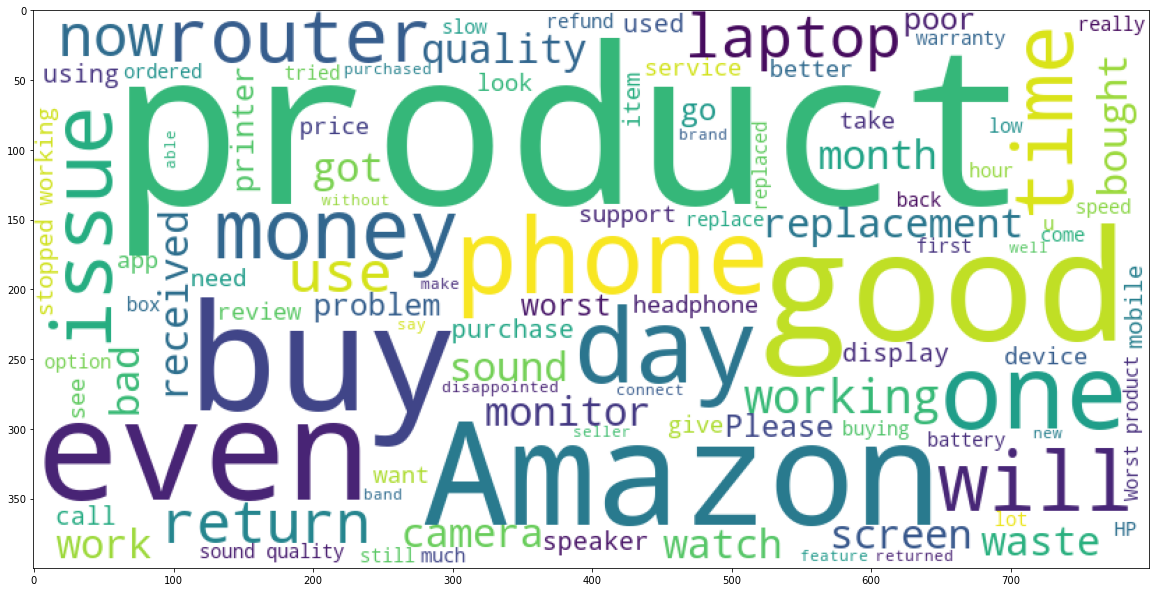

In [55]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width=800, height=400,background_color='white',max_words=100).generate(sentences_1_combining))

Above plot is the WordCloud for 1 star ratings 

### Data Preprocessing

In [56]:
## Lets remove all the punctuations from the review text

In [57]:
# importing regex
import re

In [58]:
# Replace email addresses with 'email'
df['Review'] = df['Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [59]:
# Replace URLs with 'webaddress'
df['Review'] = df['Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [60]:
# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['Review'] = df['Review'].str.replace(r'£|\$₹', 'moneysymbol')

In [61]:
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['Review'] = df['Review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

In [62]:
# Replace numbers with 'number'
df['Review'] = df['Review'].str.replace(r'\d+(\.\d+)?', 'number')

In [63]:
# Remove punctuation
df['Review'] = df['Review'].str.replace(r'[^\w\d\s]', ' ')

In [64]:
# Replace whitespace between terms with a single space
df['Review'] = df['Review'].str.replace(r'\s+', ' ')

In [65]:
df.head()

,Review,Rating,Length
0,look ok but my heart monitor sensors stopped w...,3,88
1,Sudden drop in price after I order Adapter loo...,1,60
2,good,5,4
3,LAN ports are number number Mbps so technicall...,2,383
4,This phone is fantastic just wow it s as good ...,5,250


In [66]:
# Convert all messages to lower case
df['Review'] = df['Review'].str.lower()

In [67]:
df.head()

,Review,Rating,Length
0,look ok but my heart monitor sensors stopped w...,3,88
1,sudden drop in price after i order adapter loo...,1,60
2,good,5,4
3,lan ports are number number mbps so technicall...,2,383
4,this phone is fantastic just wow it s as good ...,5,250


In [68]:
## Lets remove stopwords from Text

In [69]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

In [70]:
#Importing Libraries
import selenium
import pandas as pd
from selenium import webdriver
import time
from selenium.common.exceptions import NoSuchElementException

In [71]:
# Executing the chromedriver.exe file
driver = webdriver.Chrome(r"C:\Users\charl\Desktop\Study\DataTrained\Internship\Selenium\driver\chromedriver.exe")                                       

In [72]:
# Url for stop words
url = "https://www.smart-words.org/abbreviations/text.html"
driver.get(url)

In [73]:
# Scrapping some extra stop words
text_SF = []

for i in driver.find_elements_by_xpath("//td[@class='tre1a trsz1']"):
    
    text_SF.append(i.text)

In [74]:
# Some of the Acronym's customers use while writing reviewes
text_SF

['2F4U',
 '4YEO FYEO',
 'AAMOF',
 'ACK',
 'AFAIK',
 'AFAIR',
 'AFK',
 'AKA',
 'B2K BTK',
 'BTT',
 'BTW',
 'B/C',
 'C&P',
 'CU',
 'CYS',
 'DIY',
 'EOBD',
 'EOD',
 'EOM',
 'EOT',
 'FAQ',
 'FACK',
 'FKA',
 'FWIW',
 'FYI / JFYI',
 'FTW',
 'HF',
 'HTH',
 'IDK',
 'IIRC',
 'IMHO',
 'IMO',
 'IMNSHO',
 'IOW',
 'ITT',
 'LOL',
 'DGMW',
 'MMW',
 'N/A',
 'NaN',
 'NNTR',
 'noob n00b',
 'NOYB',
 'NRN',
 'OMG',
 'OP',
 'OT',
 'OTOH',
 'PEBKAC',
 'POV',
 'ROTFL',
 'RSVP',
 'RTFM',
 'SCNR',
 'SFLR',
 'SPOC',
 'TBA',
 'TBC',
 'TIA',
 'TGIF',
 'THX TNX',
 'TQ',
 'TYVM',
 'TYT',
 'TTYL',
 'w00t',
 'WFM',
 'WRT',
 'WTH',
 'WTF',
 'YMMD',
 'YMMV',
 'YAM',
 'ICYMI',
 '2moro',
 '2nte',
 'AEAP',
 'ALAP',
 'ASAP',
 'ASL',
 'B3',
 'B4YKI',
 'BFF',
 'BM&Y',
 'BRB',
 'BRT',
 'BTAM',
 'C-P',
 'CTN',
 'CUS',
 'CWOT',
 'CYT',
 'E123',
 'EM?',
 'EOD',
 'F2F',
 'FC',
 'FOAF',
 'GR8',
 'HAK',
 'IDC',
 'IDK',
 'ILU / ILY',
 'IMU',
 'IRL',
 'J/K',
 'JC',
 'JTLYK',
 'KFY',
 'KMN',
 'KPC',
 'L8R',
 'MoF',
 'MTFBWY',
 'MYOB',

In [75]:
# Using map function
out = map(lambda x:x.lower(), text_SF)
  
# Converting it into list
my_words = list(out)

In [76]:
len(my_words)

150

In [77]:
# Some more stop words
list_1 = ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']

In [78]:
for i in list_1:
    
    my_words.append(i)

In [79]:
len(my_words)

159

In [80]:
# create a variable name stop word

stop_words = set(stopwords.words('english') + my_words)

In [81]:
# Removing Stop words
df["Review"] = df["Review"].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))                     

In [82]:
df.head()

,Review,Rating,Length
0,look ok heart monitor sensors stopped working ...,3,88
1,sudden drop price order adapter looks duplicate,1,60
2,good,5,4
3,lan ports number number mbps technically alway...,2,383
4,phone fantastic wow good expected battery almo...,5,250


In [83]:
# New column (clean_length) after puncuations,stopwords removal
df['New_length'] = df.Review.str.len()

In [84]:
df.head()

,Review,Rating,Length,New_length
0,look ok heart monitor sensors stopped working ...,3,88,69
1,sudden drop price order adapter looks duplicate,1,60,47
2,good,5,4,4
3,lan ports number number mbps technically alway...,2,383,295
4,phone fantastic wow good expected battery almo...,5,250,177


In [85]:
# Total length removal
print ('Origian Length', df.Length.sum())
print("\n")
print ('Clean Length', df.New_length.sum())

Origian Length 7200963


Clean Length 5052579


In [86]:
# We need to remove the emojes from review texts
def deEmojify(text):
    
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [87]:
df["Review"] = df["Review"].apply(deEmojify)

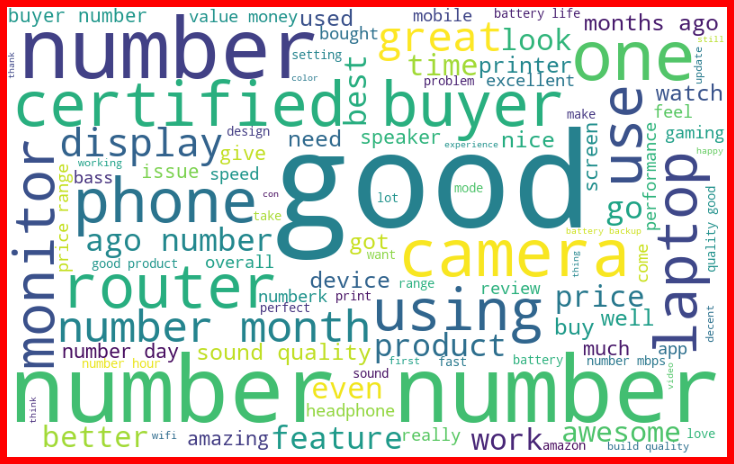

In [88]:
review_5 = df['Review'][df['Rating']==5]

rev_cloud = WordCloud(width=800,height=500,background_color='white',max_words=100).generate(' '.join(review_5))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(rev_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [89]:
## 5 star reviewes after text preprocessing

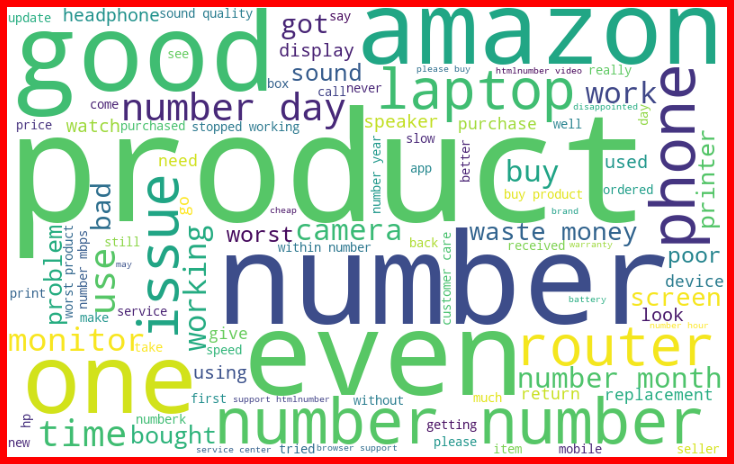

In [90]:
review_1 = df['Review'][df['Rating']==1]

rev_cloud_1 = WordCloud(width=800,height=500,background_color='white',max_words=100).generate(' '.join(review_1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(rev_cloud_1)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [91]:
## 1 star reviewes after text preprocessing

In [92]:
## Lets drop the Length and New Length column
df = df.drop(["Length","New_length"],axis=1)

In [93]:
df.head()

,Review,Rating
0,look ok heart monitor sensors stopped working ...,3
1,sudden drop price order adapter looks duplicate,1
2,good,5
3,lan ports number number mbps technically alway...,2
4,phone fantastic wow good expected battery almo...,5


In [94]:
# We need to remove all the Foreign languages from the reviewes
df = df[df['Review'].map(lambda x: x.isascii())]

In [95]:
df.head()

,Review,Rating
0,look ok heart monitor sensors stopped working ...,3
1,sudden drop price order adapter looks duplicate,1
2,good,5
3,lan ports number number mbps technically alway...,2
4,phone fantastic wow good expected battery almo...,5


In [96]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [97]:
from nltk.stem.porter import PorterStemmer

In [98]:
df.head()

,Review,Rating
0,look ok heart monitor sensors stopped working ...,3
1,sudden drop price order adapter looks duplicate,1
2,good,5
3,lan ports number number mbps technically alway...,2
4,phone fantastic wow good expected battery almo...,5


In [99]:
#Stemming the text
def simple_stemmer(text):
    
    ps=nltk.porter.PorterStemmer()
    
    text= ' '.join([ps.stem(word) for word in text.split()])
    
    return text

In [100]:
df['Review'] = df['Review'].apply(simple_stemmer)

In [101]:
df.head()

,Review,Rating
0,look ok heart monitor sensor stop work pleas g...,3
1,sudden drop price order adapt look duplic,1
2,good,5
3,lan port number number mbp technic alway cap n...,2
4,phone fantast wow good expect batteri almost n...,5


## Applying count vectorizer

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

In [103]:
vectorizer = CountVectorizer()

In [104]:
reviews_countvectorizer = vectorizer.fit_transform(df['Review'])

In [105]:
#print(vectorizer.get_feature_names())

In [106]:
print(reviews_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [107]:
# Checking the shape
reviews_countvectorizer.shape

(19904, 14890)

In [108]:
df.head()

,Review,Rating
0,look ok heart monitor sensor stop work pleas g...,3
1,sudden drop price order adapt look duplic,1
2,good,5
3,lan port number number mbp technic alway cap n...,2
4,phone fantast wow good expect batteri almost n...,5


In [109]:
# Creating a dataframe for reviewes
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [110]:
reviews.head()

,0,1,2,3,4,5,6,7,8,9,...,14880,14881,14882,14883,14884,14885,14886,14887,14888,14889
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
X = reviews
y = df["Rating"]

### Train Test Split

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [114]:
X_train.shape

(13932, 14890)

In [115]:
X_test.shape

(5972, 14890)

In [116]:
y_train.shape

(13932,)

In [117]:
y_test.shape

(5972,)

### Model Building

#### Naive Bayes

In [118]:
from sklearn.naive_bayes import MultinomialNB

In [119]:
NB_classifier = MultinomialNB()

In [120]:
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [121]:
NB_classifier.score(X_train,y_train)

0.6378122308354867

In [122]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [123]:
predict_NB = NB_classifier.predict(X_test)

In [124]:
print(accuracy_score(y_test,predict_NB))

0.5108841259209645


In [125]:
print(classification_report(y_test,predict_NB))

              precision    recall  f1-score   support

           1       0.57      0.71      0.64      1188
           2       0.54      0.36      0.43      1144
           3       0.44      0.35      0.39      1144
           4       0.42      0.47      0.45      1209
           5       0.56      0.64      0.60      1287

    accuracy                           0.51      5972
   macro avg       0.51      0.51      0.50      5972
weighted avg       0.51      0.51      0.50      5972



<AxesSubplot:>

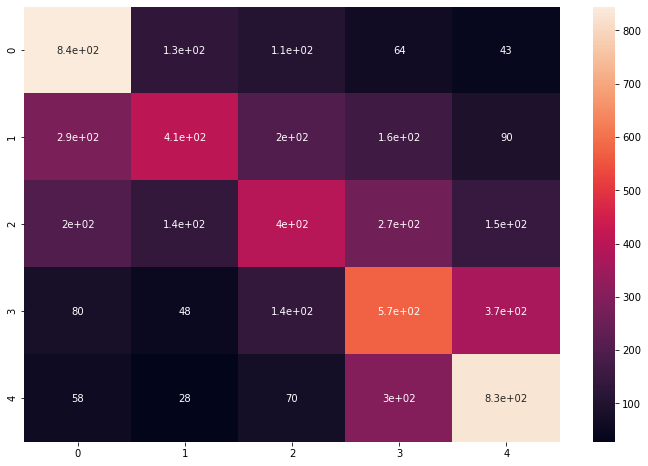

In [126]:
plt.figure(figsize=(12,8))
cm = confusion_matrix(y_test,predict_NB)
sns.heatmap(cm, annot=True)

### Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
Lr = LogisticRegression()

In [129]:
Lr.fit(X_train,y_train)

LogisticRegression()

In [245]:
Lr.score(X_train,y_train)

0.6571202985931668

In [131]:
predict_LR = Lr.predict(X_test)

In [132]:
print(accuracy_score(y_test,predict_LR))

0.5674815807099799


In [133]:
print(classification_report(y_test,predict_LR))

              precision    recall  f1-score   support

           1       0.69      0.71      0.70      1188
           2       0.50      0.51      0.51      1144
           3       0.45      0.49      0.47      1144
           4       0.56      0.45      0.50      1209
           5       0.63      0.67      0.65      1287

    accuracy                           0.57      5972
   macro avg       0.57      0.57      0.56      5972
weighted avg       0.57      0.57      0.57      5972



<AxesSubplot:>

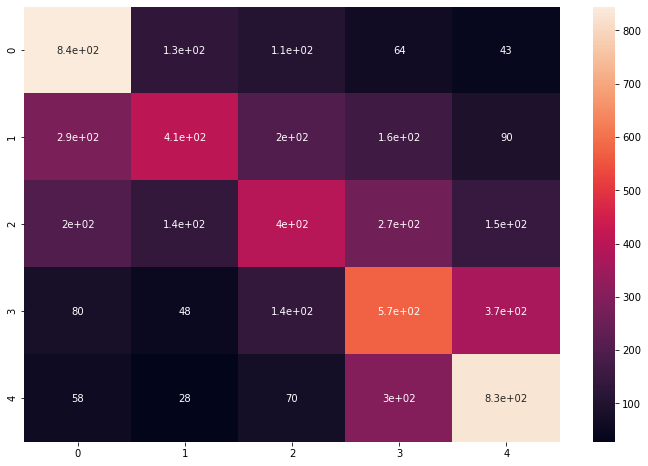

In [134]:
plt.figure(figsize=(12,8))
cm_Lr = confusion_matrix(y_test,predict_LR)
sns.heatmap(cm, annot=True)

### Applying TFIDF

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [136]:
tfidf = TfidfVectorizer()

In [137]:
reviews_tv = tfidf.fit_transform(df['Review'])

In [138]:
#print(tfidf.get_feature_names())

In [139]:
print(reviews_tv.toarray())  

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [140]:
# Checking the shape
reviews_tv.shape

(19904, 14890)

In [141]:
df.head()

,Review,Rating
0,look ok heart monitor sensor stop work pleas g...,3
1,sudden drop price order adapt look duplic,1
2,good,5
3,lan port number number mbp technic alway cap n...,2
4,phone fantast wow good expect batteri almost n...,5


In [142]:
# Creating a dataframe for reviewes
reviews_tv = pd.DataFrame(reviews_tv.toarray())

In [143]:
reviews_tv.head()

,0,1,2,3,4,5,6,7,8,9,...,14880,14881,14882,14883,14884,14885,14886,14887,14888,14889
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
X = reviews_tv
y = df["Rating"]

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [146]:
X_train.shape

(13932, 14890)

In [147]:
X_test.shape

(5972, 14890)

In [148]:
y_train.shape

(13932,)

In [149]:
y_train.shape

(13932,)

### Naive Bayes for Tfidf

In [150]:
tfIdf_NB = MultinomialNB()

In [151]:
tfIdf_NB.fit(X_train,y_train)

MultinomialNB()

In [152]:
tfIdf_NB.score(X_train,y_train)

0.6686764283663509

In [153]:
predict_NB_tv = tfIdf_NB.predict(X_test)

In [154]:
print(accuracy_score(y_test,predict_NB_tv))

0.5145679839249833


In [155]:
print(classification_report(y_test,predict_NB_tv))

              precision    recall  f1-score   support

           1       0.59      0.70      0.64      1188
           2       0.55      0.38      0.45      1144
           3       0.45      0.29      0.36      1144
           4       0.42      0.54      0.47      1209
           5       0.56      0.64      0.60      1287

    accuracy                           0.51      5972
   macro avg       0.51      0.51      0.50      5972
weighted avg       0.51      0.51      0.51      5972



<AxesSubplot:>

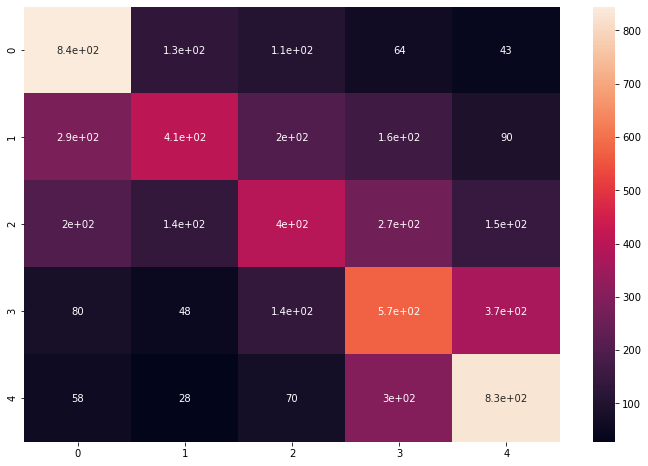

In [156]:
plt.figure(figsize=(12,8))
cm_Lr = confusion_matrix(y_test,predict_NB_tv)
sns.heatmap(cm, annot=True)

### Logistic Regression with tfidf

In [157]:
Lr_tv = LogisticRegression()

In [158]:
Lr_tv.fit(X_train,y_train)

LogisticRegression()

In [159]:
Lr_tv.score(X_train,y_train)

0.7217915590008613

In [160]:
predict_Lr_tv = Lr_tv.predict(X_test)

In [161]:
print(accuracy_score(y_test,predict_Lr_tv))

0.5425318151373074


In [162]:
print(classification_report(y_test,predict_Lr_tv))

              precision    recall  f1-score   support

           1       0.65      0.69      0.67      1188
           2       0.48      0.49      0.48      1144
           3       0.43      0.41      0.42      1144
           4       0.50      0.47      0.48      1209
           5       0.62      0.65      0.63      1287

    accuracy                           0.54      5972
   macro avg       0.54      0.54      0.54      5972
weighted avg       0.54      0.54      0.54      5972



In [163]:
df.head()

,Review,Rating
0,look ok heart monitor sensor stop work pleas g...,3
1,sudden drop price order adapt look duplic,1
2,good,5
3,lan port number number mbp technic alway cap n...,2
4,phone fantast wow good expect batteri almost n...,5


In [164]:
reviews.head()

,0,1,2,3,4,5,6,7,8,9,...,14880,14881,14882,14883,14884,14885,14886,14887,14888,14889
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
print(np.concatenate((predict_NB.reshape(len(predict_NB),1), y_test.values.reshape(len(y_test),1)),1))

[[3 3]
 [4 4]
 [5 2]
 ...
 [5 5]
 [3 4]
 [4 4]]


#### Building an ANN

In [166]:
df.head()

,Review,Rating
0,look ok heart monitor sensor stop work pleas g...,3
1,sudden drop price order adapt look duplic,1
2,good,5
3,lan port number number mbp technic alway cap n...,2
4,phone fantast wow good expect batteri almost n...,5


In [167]:
import tensorflow as tf

In [177]:
# Building the model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=500,activation='relu',input_shape = (14890, )))

model.add(tf.keras.layers.Dense(units=500,activation='relu'))

model.add(tf.keras.layers.Dense(units=500,activation='relu'))

model.add(tf.keras.layers.Dense(units=400,activation='relu'))

model.add(tf.keras.layers.Dense(units=200,activation='relu'))

model.add(tf.keras.layers.Dense(units=6,activation='softmax'))

In [178]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 500)               7445500   
_________________________________________________________________
dense_7 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_8 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_9 (Dense)              (None, 400)               200400    
_________________________________________________________________
dense_10 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 1206      
Total params: 8,228,306
Trainable params: 8,228,306
Non-trainable params: 0
____________________________________________

In [179]:
model.compile(optimizer= 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [180]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [181]:
# using early stopping to exit training if validation loss is not decreasing after certain number of epochs

earlystopping = EarlyStopping(monitor="val_loss", mode="min", patience=20)

In [182]:
# Save the best model with low validation loss

checkPointer = ModelCheckpoint(filepath="rating.hdf5", verbose=1, save_best_only=True)

In [183]:
history = model.fit(X_train, y_train, batch_size= 64,epochs= 30,validation_split=0.2)

Epoch 1/30
175/175 [==============================] - 10s 58ms/step - loss: 1.2986 - accuracy: 0.4249 - val_loss: 1.1426 - val_accuracy: 0.5235
Epoch 2/30
175/175 [==============================] - 10s 58ms/step - loss: 0.7780 - accuracy: 0.7007 - val_loss: 1.1535 - val_accuracy: 0.5676
Epoch 3/30
175/175 [==============================] - 11s 61ms/step - loss: 0.3590 - accuracy: 0.8690 - val_loss: 1.5206 - val_accuracy: 0.5590
Epoch 4/30
175/175 [==============================] - 11s 62ms/step - loss: 0.1895 - accuracy: 0.9317 - val_loss: 1.6685 - val_accuracy: 0.5773
Epoch 5/30
175/175 [==============================] - 11s 63ms/step - loss: 0.1137 - accuracy: 0.9564 - val_loss: 2.1848 - val_accuracy: 0.5741
Epoch 6/30
175/175 [==============================] - 11s 60ms/step - loss: 0.0903 - accuracy: 0.9631 - val_loss: 2.3378 - val_accuracy: 0.5723
Epoch 7/30
175/175 [==============================] - 11s 61ms/step - loss: 0.0850 - accuracy: 0.9668 - val_loss: 2.3774 - val_accuracy:

In [184]:
# Predicting results
y_pred = model.predict(X_test)

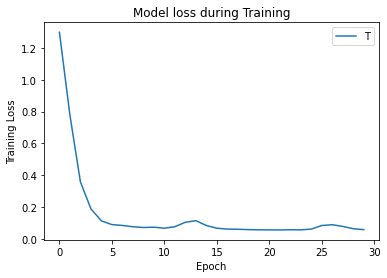

In [185]:
plt.plot(history.history['loss'])
plt.title('Model loss during Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend('Training loss')

#### Training loss VS Epoch

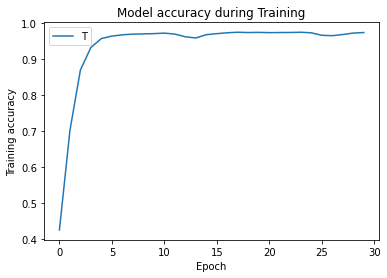

In [186]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy during Training')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend('Training accuracy')

#### Training accuracy VS Epoch

In [187]:
y_pred = np.argmax(y_pred,axis=1)

<AxesSubplot:>

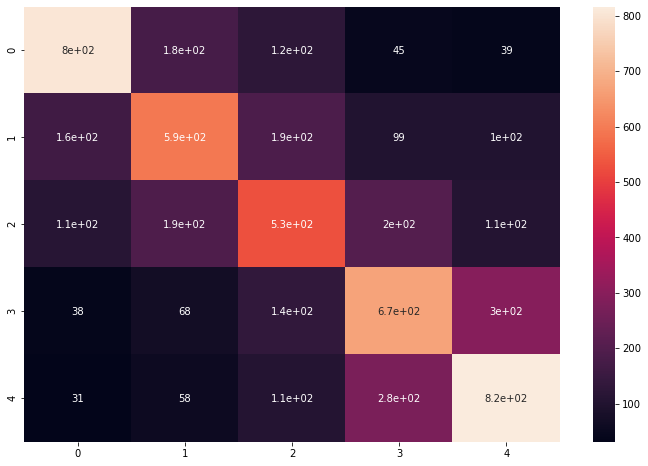

In [188]:
# Confusion matrix for ANN model
plt.figure(figsize=(12,8))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [189]:
# Classification report for ANN model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.70      0.68      0.69      1188
           2       0.55      0.52      0.53      1144
           3       0.49      0.46      0.47      1144
           4       0.52      0.56      0.54      1209
           5       0.60      0.63      0.62      1287

    accuracy                           0.57      5972
   macro avg       0.57      0.57      0.57      5972
weighted avg       0.57      0.57      0.57      5972



In [190]:
# ANN model accuracy
print(accuracy_score(y_test,y_pred))

0.5713328868050904


In [191]:
y_pred

array([3, 4, 4, ..., 5, 4, 4], dtype=int64)

### Predicting individual input

In [218]:
def predict_rating(sample_review):
    
    sample_review = re.sub(pattern= r'^.+@[^\.].*\.[a-z]{2,}$', repl='emailaddress', string = sample_review)
    
    sample_review = re.sub(pattern= r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', repl='webaddress', string = sample_review)
    
    sample_review = re.sub(pattern= r'£|\$₹' , repl='moneysymbol', string = sample_review)
    
    sample_review = re.sub(pattern= r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$' , repl='phonenumber', string = sample_review)
    
    sample_review = re.sub(pattern= r'\d+(\.\d+)?' , repl='number', string = sample_review)
    
    sample_review = re.sub(pattern= r'[^\w\d\s]' , repl=' ', string = sample_review)
    
    sample_review = re.sub(pattern= r'\s+' , repl=' ', string = sample_review)
    
    sample_review = sample_review.lower()
    
    sample_review_words = sample_review.split()
    
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    
    ps = PorterStemmer()
    
    final_review = [ps.stem(word) for word in sample_review_words]
    
    final_review = ' '.join(final_review)
    
    temp = tfidf.transform([final_review]).toarray()
    
    temp_final = model.predict(temp)
    
    rating_val = np.argmax(temp_final)
    
    return rating_val

In [224]:
text = predict_rating("Good Product I like it")

if text == 1:
    
    print("The Customer review is 1 star")
    
elif text == 2:
    
    print("The Customer review is 2 star")
    
elif text == 3:
    
    print("The Customer review is 3 star")
    
elif text == 4:
    
    print("The Customer review is 4 star")
    
elif text == 5:
    
    print("The Customer review is 5 star")

The Customer review is 5 star


In [225]:
text = predict_rating("Good Product")

if text == 1:
    
    print("The Customer review is 1 star")
    
elif text == 2:
    
    print("The Customer review is 2 star")
    
elif text == 3:
    
    print("The Customer review is 3 star")
    
elif text == 4:
    
    print("The Customer review is 4 star")
    
elif text == 5:
    
    print("The Customer review is 5 star")

The Customer review is 4 star


In [226]:
text = predict_rating("Decent Product")

if text == 1:
    
    print("The Customer review is 1 star")
    
elif text == 2:
    
    print("The Customer review is 2 star")
    
elif text == 3:
    
    print("The Customer review is 3 star")
    
elif text == 4:
    
    print("The Customer review is 4 star")
    
elif text == 5:
    
    print("The Customer review is 5 star")

The Customer review is 2 star


In [227]:
text = predict_rating("Worst Product ever")

if text == 1:
    
    print("The Customer review is 1 star")
    
elif text == 2:
    
    print("The Customer review is 2 star")
    
elif text == 3:
    
    print("The Customer review is 3 star")
    
elif text == 4:
    
    print("The Customer review is 4 star")
    
elif text == 5:
    
    print("The Customer review is 5 star")

The Customer review is 1 star


### Saving the model

In [228]:
import pickle

In [229]:
# Creating a pickle file for the tfIdf 
pickle.dump(tfidf, open('tf-transform.pkl', 'wb'))

In [239]:
from tensorflow.keras.models import load_model

In [240]:
# Saving DL model
model.save('customer-review-rating-model.h5')

# returns a compiled model
# identical to the previous one
#model = load_model('my_model.h5')

In [241]:
# Creating a pickle file for LR model

filename = 'lr-product-rating-model.pkl'

pickle.dump(Lr, open(filename, 'wb'))